In [1]:
import json
import sys
import pandas as pd
import matplotlib.pyplot as plt

YSNO_MAP = set(['is', 'can', 'does', 'are', 'do', 'should', 'did', 'will', 'was', 'has', 'could', 'were', 'would'])

In [2]:
def getDF(path):
    i = 0
    df = {}
    with open(path, 'r') as fp:
        for line in fp:
            df[i] = json.loads(line)
            i += 1
    
    return pd.DataFrame.from_dict(df, orient='index')

In [3]:
def general_stats_data(df):
    query_type_label = {'YESNO': 0, 'DESCRIPTION':0}
    wfa = 0
    total_judgements = 0
    total_wfa_judgments = 0
    multiple_answers = 0
    multiple_wfa = 0
    total_size = len(df)
    for row in df.iterrows():
        category = row[1]['query_type']
        total_judgements += len(row[1]['answers'])
        currentwfa = row[1]['wellFormedAnswers']
        if category in query_type_label:
            query_type_label[category] += 1
        else:
            print(category)
        if len(row[1]['answers']) > 1:
            multiple_answers += 1
        if currentwfa != '[]':
            wfa += 1
            total_wfa_judgments += len(currentwfa)
            if len(currentwfa) > 1:
                multiple_wfa += 1
    print('Columns:{}'.format(df.columns.values))
    print('{} queries with {} judgements with {} queries contain more than one judgment'.format(total_size,total_judgements,multiple_answers))
    #print('{} queries with Well Formed Answers of which {} contain more than one judgment'.format(wfa,multiple_wfa))
    print('----query distribution by dataset type----')
    for key in query_type_label:
        print(key + ',' + str(query_type_label[key])+ ',' + str(query_type_label[key]/total_size))

In [4]:
def update_query_type(query, query_type, qmap):
    assert len(query) > 0
    query = query.lower()
    head = query.split()[0]
    if query_type == "YESNO":
        qmap['yesno'] += 1
    elif head in qmap:
        qmap[head] += 1
    else:
        qmap['other'] +=1

In [5]:
def compute_query_word_stat(df):
    print('----query distribution by wording----')
    query_type_map = {'yesno':0, 'what':0, 'who':0, 'which':0, 'where':0, 'when':0, 'why':0, 'how':0, 'other':0}
    for row in df.iterrows():
        query = row[1]["query"]
        query_type = row[1]["query_type"]
        update_query_type(query, query_type, query_type_map)
    total = sum(list(query_type_map.values()))
    print(total)
    for k, v in query_type_map.items():
        print('{},{},{}'.format(k, v, 1.0 * v/total))

In [6]:
def get_stats(histogram):
    average = 0.0
    total_values = 0.0
    for value in histogram:
        total_values += histogram[value]
        average += float(histogram[value]) * float(value)
    return average/total_values

In [14]:
def generate_histograms(histogram, title):
    average = get_stats(histogram)
    print("###################################\n")
    print("Statistics about {}\n".format(title))
    print("Average length:{}",format(average))
    print("###################################\n")
    plt.bar(list(histogram.keys()), histogram.values(), color='g')
    plt.show()
    #for key in sorted(histogram.keys()):
    #   print("{}:{}".format(key, histogram[key]))

In [15]:
def compute_length_stat(df):
    queries = {}
    answers = {}
    well_formed_answers = {}
    passages = {}

    for row in df.iterrows():
        queries[row[1]['query']] = 1
        for v in row[1]['answers']:
            answers[v] = 1
        for p in row[1]['passages']:
            passages[p['passage_text']] = 1
    data = {'queries' : queries, 'answers' : answers, 'passages' : passages}
    for value in data:
        histogram = {}
        for v in data[value]:
            l = len(v.split())
            if l in histogram:
                histogram[l] += 1
            else:
                histogram[l] = 1
        generate_histograms(histogram, value)

# Load data

In [8]:
data_dir = "/Users/rchanda/Acads/Fall-2018/Capstone/Explicable-Question-Answering/data/"

In [9]:
train_infile = data_dir+"train-qar_msmarco_all.jsonl"
train_df = getDF(train_infile)

In [9]:
val_infile = data_dir+"val-qar_msmarco_all.jsonl"
val_df = getDF(val_infile)

test_infile = data_dir+"test-qar_msmarco_all.jsonl"
test_df = getDF(test_infile)

# General Stats

In [11]:
general_stats_data(train_df)

Columns:['answers' 'passages' 'query' 'query_id' 'query_type' 'wellFormedAnswers']
738907 queries with 2898133 judgements with 733670 queries contain more than one judgment
----query distribution by dataset type----
YESNO,110488,0.14952896643285285
DESCRIPTION,628419,0.8504710335671471


In [10]:
general_stats_data(val_df)

Columns:['answers' 'passages' 'query' 'query_id' 'query_type' 'wellFormedAnswers']
92496 queries with 364083 judgements with 91835 queries contain more than one judgment
----query distribution by dataset type----
YESNO,13605,0.14708744161909704
DESCRIPTION,78891,0.852912558380903


In [11]:
general_stats_data(test_df)

Columns:['answers' 'passages' 'query' 'query_id' 'query_type' 'wellFormedAnswers']
92384 queries with 362104 judgements with 91715 queries contain more than one judgment
----query distribution by dataset type----
YESNO,13954,0.1510434707308625
DESCRIPTION,78430,0.8489565292691376


# Query Stats

In [12]:
compute_query_word_stat(train_df)

----query distribution by wording----
738907
yesno,110488,0.14952896643285285
what,70383,0.09525285320074109
who,423,0.0005724671711054301
which,2516,0.003405029320333953
where,8569,0.011596858603315437
when,2681,0.0036283321175736593
why,4588,0.006209171113550149
how,66404,0.08986787241154841
other,472855,0.6399384496289791


In [12]:
compute_query_word_stat(val_df)

----query distribution by wording----
92496
yesno,13605,0.14708744161909704
what,8852,0.09570143573776163
who,37,0.00040001729804532086
which,318,0.0034379865075246496
where,1123,0.012141065559591767
when,340,0.0036758346306867322
why,539,0.005827279017471026
how,8318,0.08992821311191836
other,59364,0.6418007265179034


In [13]:
compute_query_word_stat(test_df)

----query distribution by wording----
92384
yesno,13954,0.1510434707308625
what,8825,0.09552519916868722
who,42,0.0004546241773467267
which,343,0.003712764114998268
where,1089,0.011787755455490129
when,333,0.0036045202632490475
why,583,0.006310616556979564
how,8099,0.0876666955316938
other,59116,0.6398943540006927


# Length Statistics

###################################

Statistics about queries

Average length:{} 14.676226743489929
###################################



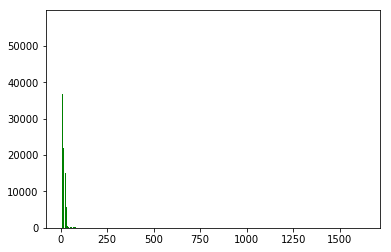

###################################

Statistics about answers

Average length:{} 30.77929061599235
###################################



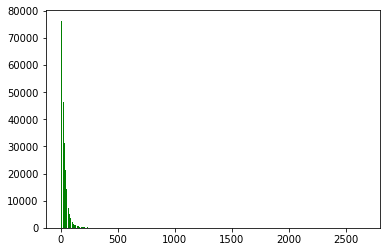

###################################

Statistics about passages

Average length:{} 72.03875690776935
###################################



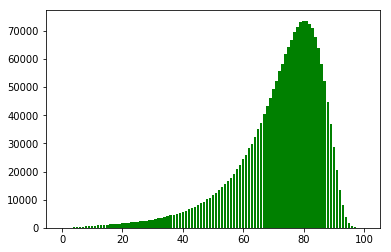

In [13]:
compute_length_stat(train_df)

###################################

Statistics about queries

Average length:{} 14.434047778521991
###################################



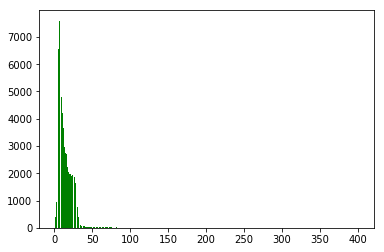

###################################

Statistics about answers

Average length:{} 30.354731646604478
###################################



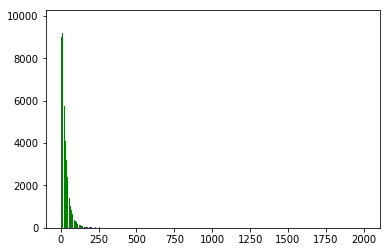

###################################

Statistics about passages

Average length:{} 72.05204675490509
###################################



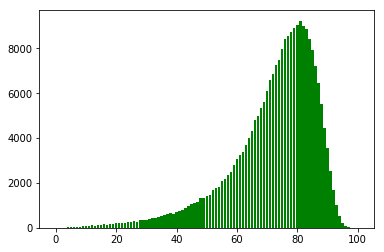

In [16]:
compute_length_stat(val_df)

###################################

Statistics about queries

Average length:{} 14.412553253184038
###################################



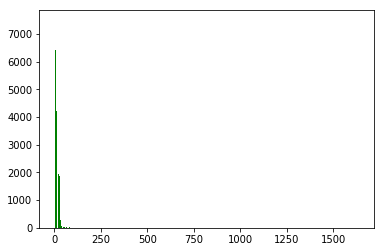

###################################

Statistics about answers

Average length:{} 30.146494341964857
###################################



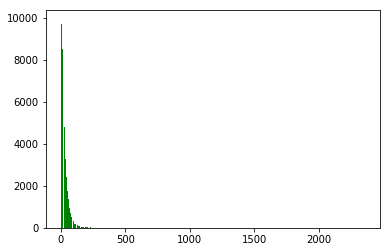

###################################

Statistics about passages

Average length:{} 72.02502122155302
###################################



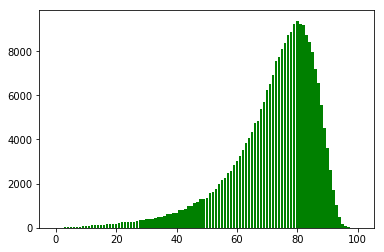

In [17]:
compute_length_stat(test_df)